Image width: 398px
Image height: 302px
Number of channels: 3


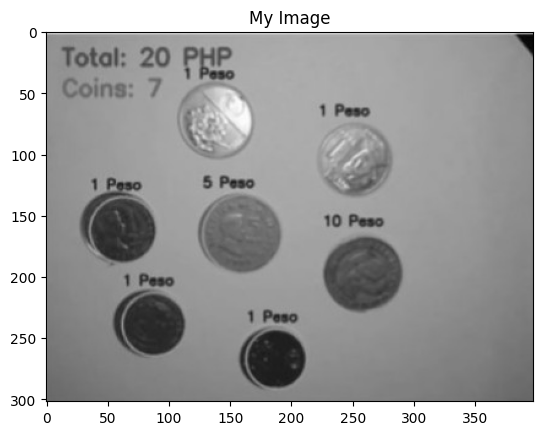

In [5]:
import cv2 
import matplotlib.pyplot as plt

# Load an image (change 'image.jpg' to your image file path)
image = cv2.imread('coins.jpg')

# Check if the image was loaded properly 
if image is None:
    print("Error: Could not load image.")
else:
    # Get the size of the image
    height, width, channels = image.shape #[rows, columns, rbg--> [r,g,b]]
    print(f"Image width: {width}px")
    print(f"Image height: {height}px")
    print(f"Number of channels: {channels}")

    # Show the image in a window
    
    image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_gray = cv2.cvtColor(image_g, cv2.COLOR_BGR2RGB)

    # Show the image in the notebook
    plt.imshow(image_gray)
    plt.title("My Image")
    plt.axis('on')  # You can use 'off' to hide axes
    plt.show()

In [6]:
import copy

original = [[1, 2], [3, 4]]
shallow = copy.copy(original)

shallow[0][0] = 99
print(original)  # [[99, 2], [3, 4]]

[[99, 2], [3, 4]]


In [7]:
original = [[1, 2], [3, 4]]
deep = copy.deepcopy(original)

In [8]:
deep[0][0] = 99
print(original)
print(deep)

[[1, 2], [3, 4]]
[[99, 2], [3, 4]]


Detected objects: 0


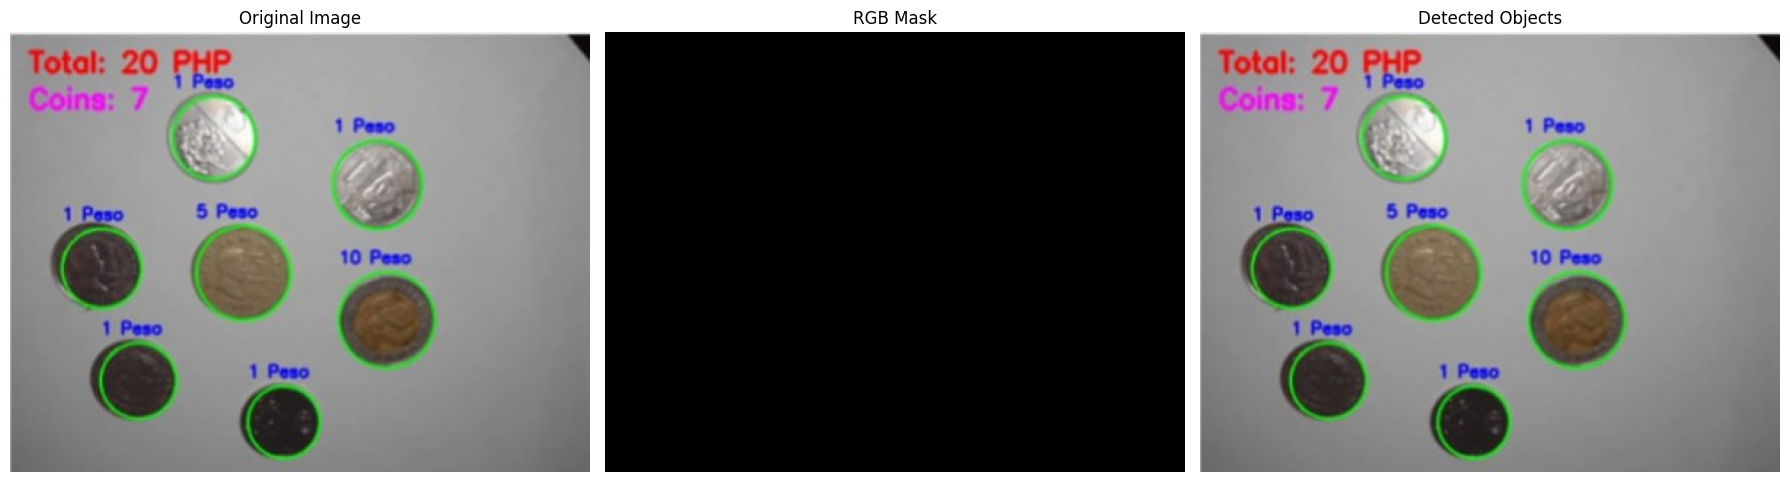

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (replace with your own image path)
image = cv2.imread('coins.jpg')  # Make sure the image is in your working directory
if image is None:
    print("Error: Could not load image.")
else:
    # Convert to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define RGB color range (example: red objects)
    lower_rgb = np.array([150, 0, 0])
    upper_rgb = np.array([255, 80, 80])

    # Create mask
    mask = cv2.inRange(rgb_image, lower_rgb, upper_rgb)

    # Clean up mask
    kernel = np.ones((5, 5), np.uint8)
    mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours
    output_image = rgb_image.copy()
    count = 0
    for contour in contours:
        if cv2.contourArea(contour) > 100:
            count += 1
            cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

    print(f"Detected objects: {count}")

    # Plotting images inline
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    axs[0].imshow(rgb_image)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(mask_cleaned, cmap='gray')
    axs[1].set_title("RGB Mask")
    axs[1].axis('off')

    axs[2].imshow(output_image)
    axs[2].set_title("Detected Objects")
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

2974.0
3199.0
3023.0
3734.0
3806.0
2852.0
3551.0
2451.0
2281.0


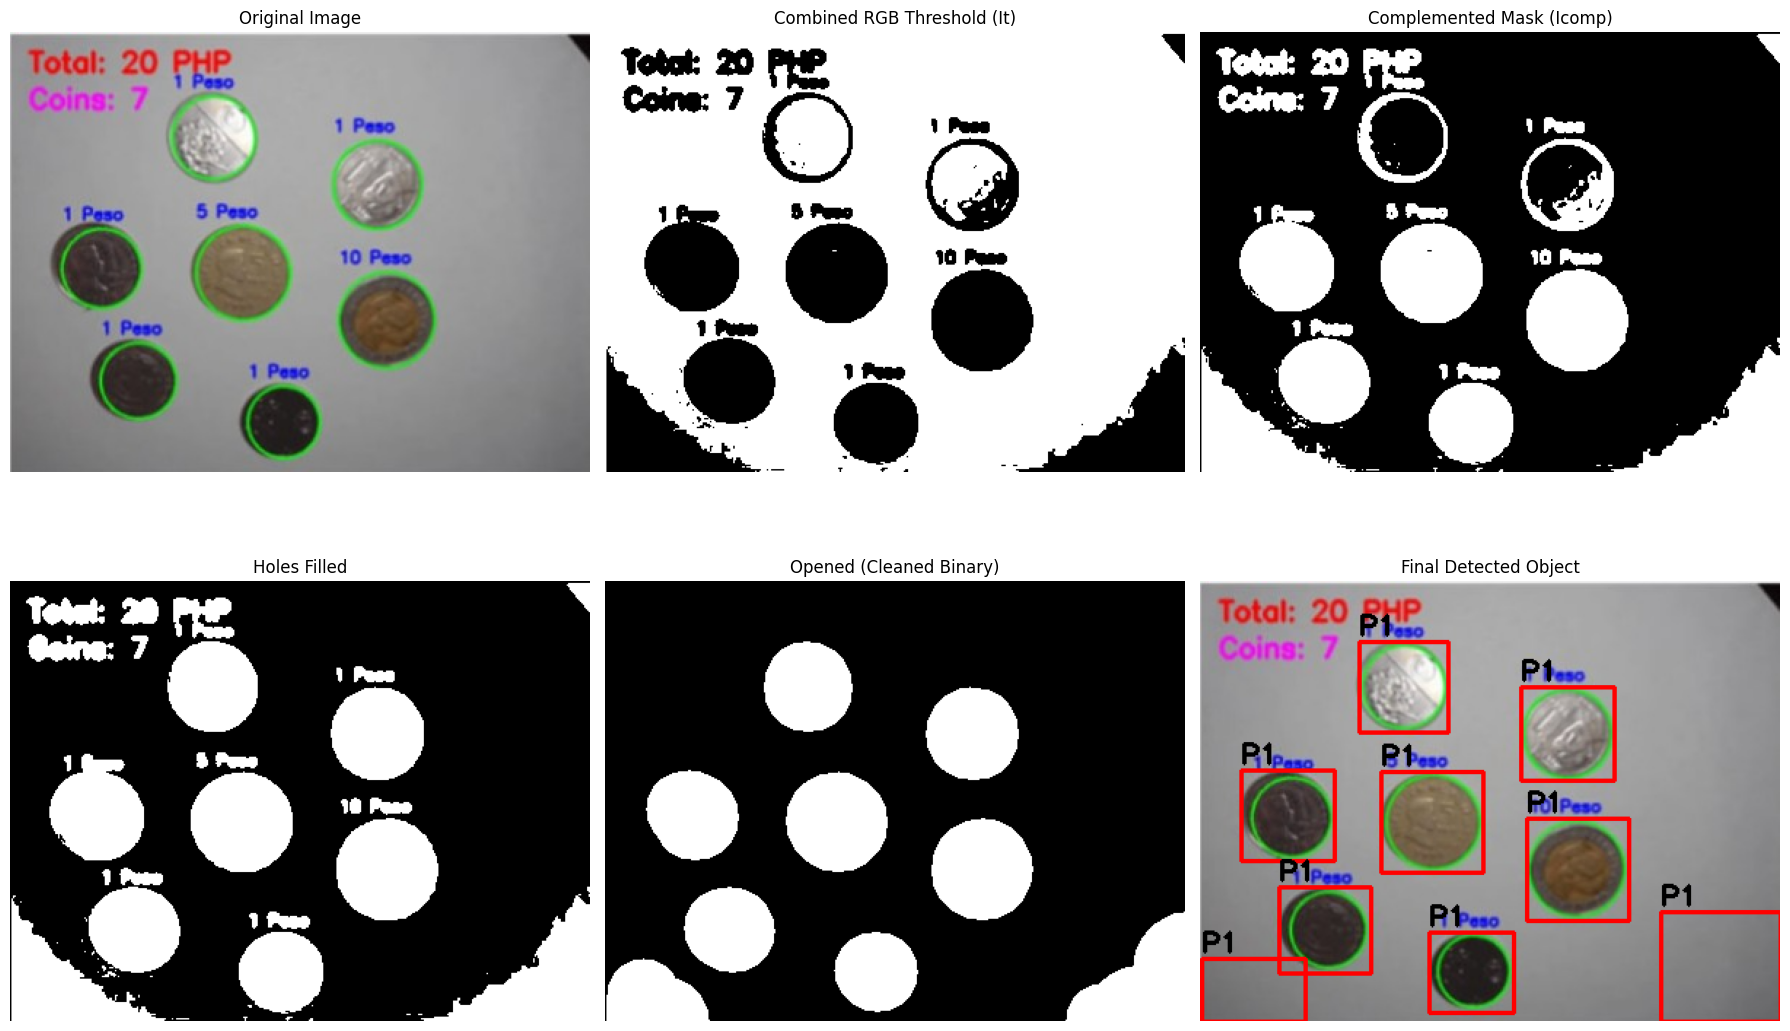

small: 9
medium: 0
large: 0
count: 9


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import disk, opening
from skimage.util import invert

# Load image
image = cv2.imread('coins.jpg')
if image is None:
    raise FileNotFoundError("Image not found.")

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract channels
rmat = image_rgb[:, :, 0]
gmat = image_rgb[:, :, 1]
bmat = image_rgb[:, :, 2]

# Threshold levels
levelr = 0.5 * 255
levelg = 0.45 * 255
levelb = 0.5 * 255

# Threshold RGB channels
Ired = (rmat > levelr).astype(np.uint8)
Igreen = (gmat > levelg).astype(np.uint8)
Iblue = (bmat > levelb).astype(np.uint8)

# Combine channels
It = cv2.bitwise_and(cv2.bitwise_and(Ired, Igreen), Iblue)

# Invert mask
Icomp = cv2.bitwise_not(It * 255)

# Fill holes
flood_fill = Icomp.copy()
h, w = flood_fill.shape
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(flood_fill, mask, (0, 0), 255)
filled = cv2.bitwise_or(Icomp, cv2.bitwise_not(flood_fill))

# Morphological open
opened = opening(filled // 255, disk(25)).astype(np.uint8)

# Label connected components
label_image = label(opened)
regions = regionprops(label_image)

###
for region in regions:
        area = region.area
        centroid = region.centroid
        print(area)

# Classify objects
small, medium, large = [], [], []
for region in regions:
    area = region.area
    if area < 14000:
        small.append(region)
    elif area < 45000:
        medium.append(region)
    else:
        large.append(region)

# Draw boxes on copy of image
output_img = image_rgb.copy()
for region in small:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (255, 0, 0), 2)
    cv2.putText(output_img, 'P1', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

for region in medium:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
    cv2.putText(output_img, 'P5', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

for region in large:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 0, 255), 2)
    cv2.putText(output_img, 'P20', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

# Display results side-by-side
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(It, cmap='gray')
axs[0, 1].set_title("Combined RGB Threshold (It)")
axs[0, 1].axis("off")

axs[0, 2].imshow(Icomp, cmap='gray')
axs[0, 2].set_title("Complemented Mask (Icomp)")
axs[0, 2].axis("off")

axs[1, 0].imshow(filled, cmap='gray')
axs[1, 0].set_title("Holes Filled")
axs[1, 0].axis("off")

axs[1, 1].imshow(opened, cmap='gray')
axs[1, 1].set_title("Opened (Cleaned Binary)")
axs[1, 1].axis("off")

axs[1, 2].imshow(output_img)
axs[1, 2].set_title("Final Detected Object")
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()

# Display total value
total_value = len(small)  + len(medium)  + len(large) 
print(f"small: {len(small)}")
print(f"medium: {len(medium)}")
print(f"large: {len(large)}")
print(f"count: {total_value}")

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import disk, opening
from skimage.util import invert

# Load image
image = cv2.imread('coins.jpg')
if image is None:
    raise FileNotFoundError("Image not found.")

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

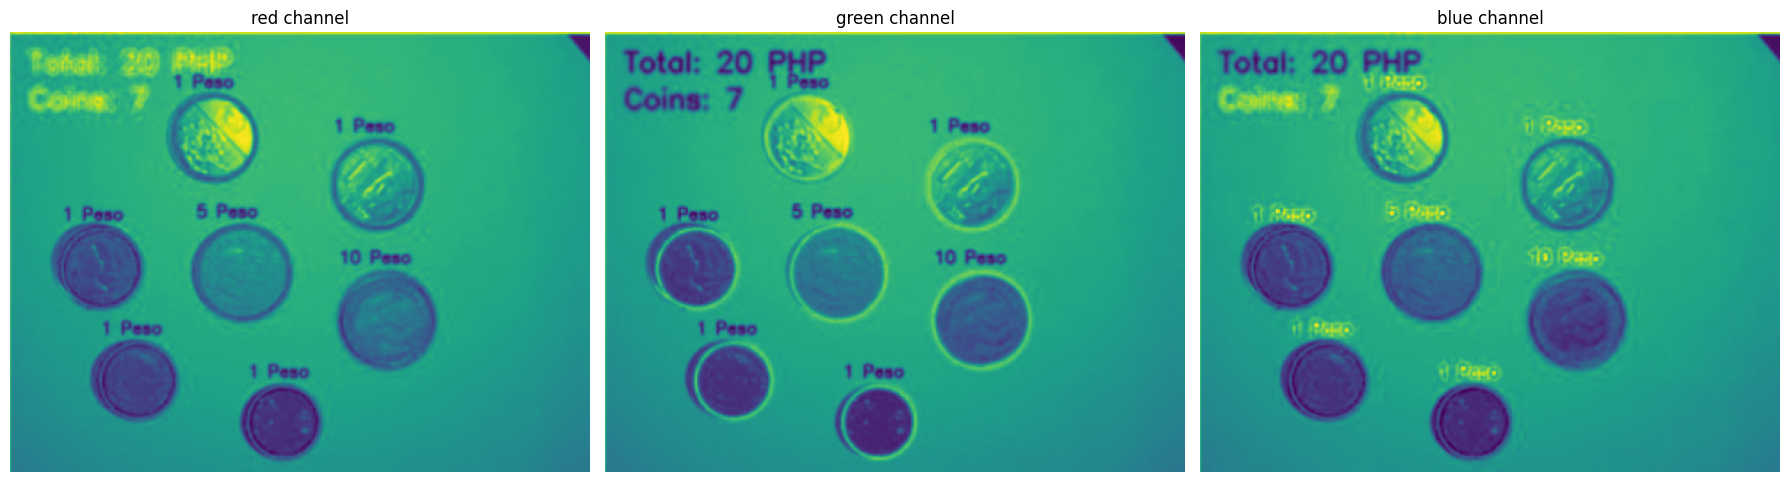

In [12]:
# Extract channels
rmat = image_rgb[:, :, 0]
gmat = image_rgb[:, :, 1]
bmat = image_rgb[:, :, 2]
#show image for each channel
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
axs[0].imshow(rmat)
axs[0].set_title("red channel")
axs[0].axis("off")

axs[1].imshow(gmat)
axs[1].set_title("green channel")
axs[1].axis("off")

axs[2].imshow(bmat)
axs[2].set_title("blue channel")
axs[2].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Threshold levels
levelr = 0.5 * 255
levelg = 0.45 * 255
levelb = 0.5 * 255

# Threshold RGB channels
Ired = (rmat > levelr).astype(np.uint8)
Igreen = (gmat > levelg).astype(np.uint8)
Iblue = (bmat > levelb).astype(np.uint8)

# Combine channels
It = cv2.bitwise_and(cv2.bitwise_and(Ired, Igreen), Iblue)

# Invert mask
Icomp = cv2.bitwise_not(It * 255)

#show image for each channel
fig, axs = plt.subplots(1, 5, figsize=(18, 12))
axs[0].imshow(Ired)
axs[0].set_title("red channel")
axs[0].axis("off")

axs[1].imshow(Igreen)
axs[1].set_title("green channel")
axs[1].axis("off")

axs[2].imshow(Iblue)
axs[2].set_title("blue channel")
axs[2].axis("off")

axs[3].imshow(It)
axs[3].set_title("Combined channel")
axs[3].axis("off")

axs[4].imshow(Icomp)
axs[4].set_title("Inverted channel")
axs[4].axis("off")

plt.tight_layout()
plt.show()

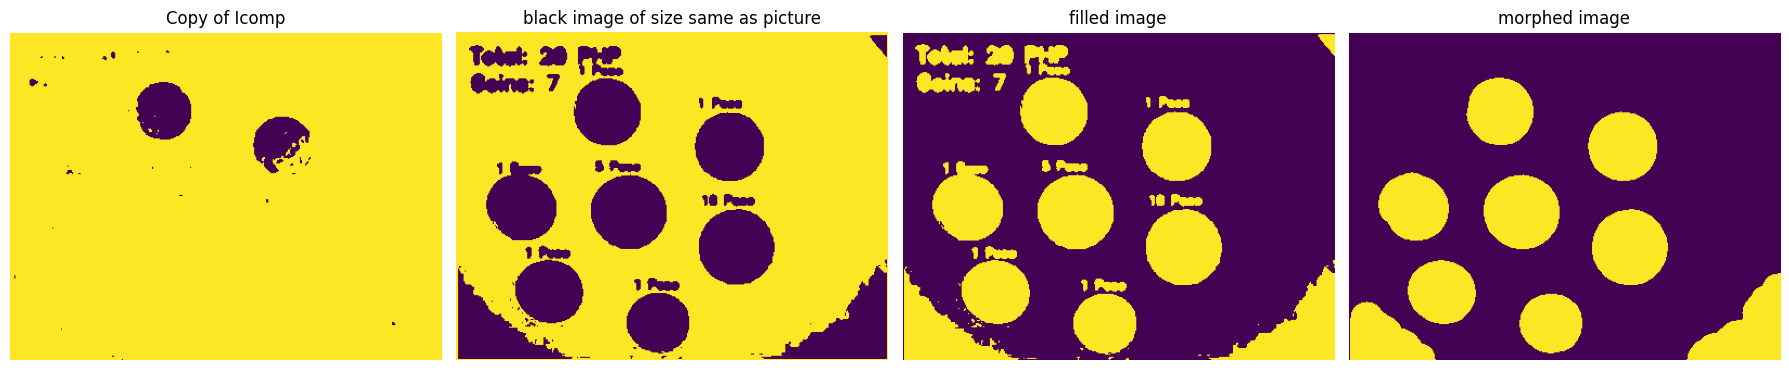

3028.0
3213.0
3103.0
3772.0
3833.0
2881.0
3720.0
2510.0
2783.0


In [13]:
# Fill holes
flood_fill = Icomp.copy()
h, w = flood_fill.shape
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(flood_fill, mask, (0, 0), 255)
filled = cv2.bitwise_or(Icomp, cv2.bitwise_not(flood_fill))

# Morphological open
opened = opening(filled // 255, disk(15)).astype(np.uint8)

# Label connected components
label_image = label(opened)
regions = regionprops(label_image)

#show image for each channel
fig, axs = plt.subplots(1, 4, figsize=(18, 12))
axs[0].imshow(flood_fill)
axs[0].set_title("Copy of Icomp")
axs[0].axis("off")

axs[1].imshow(mask)
axs[1].set_title("black image of size same as picture")
axs[1].axis("off")

axs[2].imshow(filled)
axs[2].set_title("filled image")
axs[2].axis("off")

axs[3].imshow(opened)
axs[3].set_title("morphed image")
axs[3].axis("off")


plt.tight_layout()
plt.show()
###
for region in regions:
        area = region.area
        print(area)

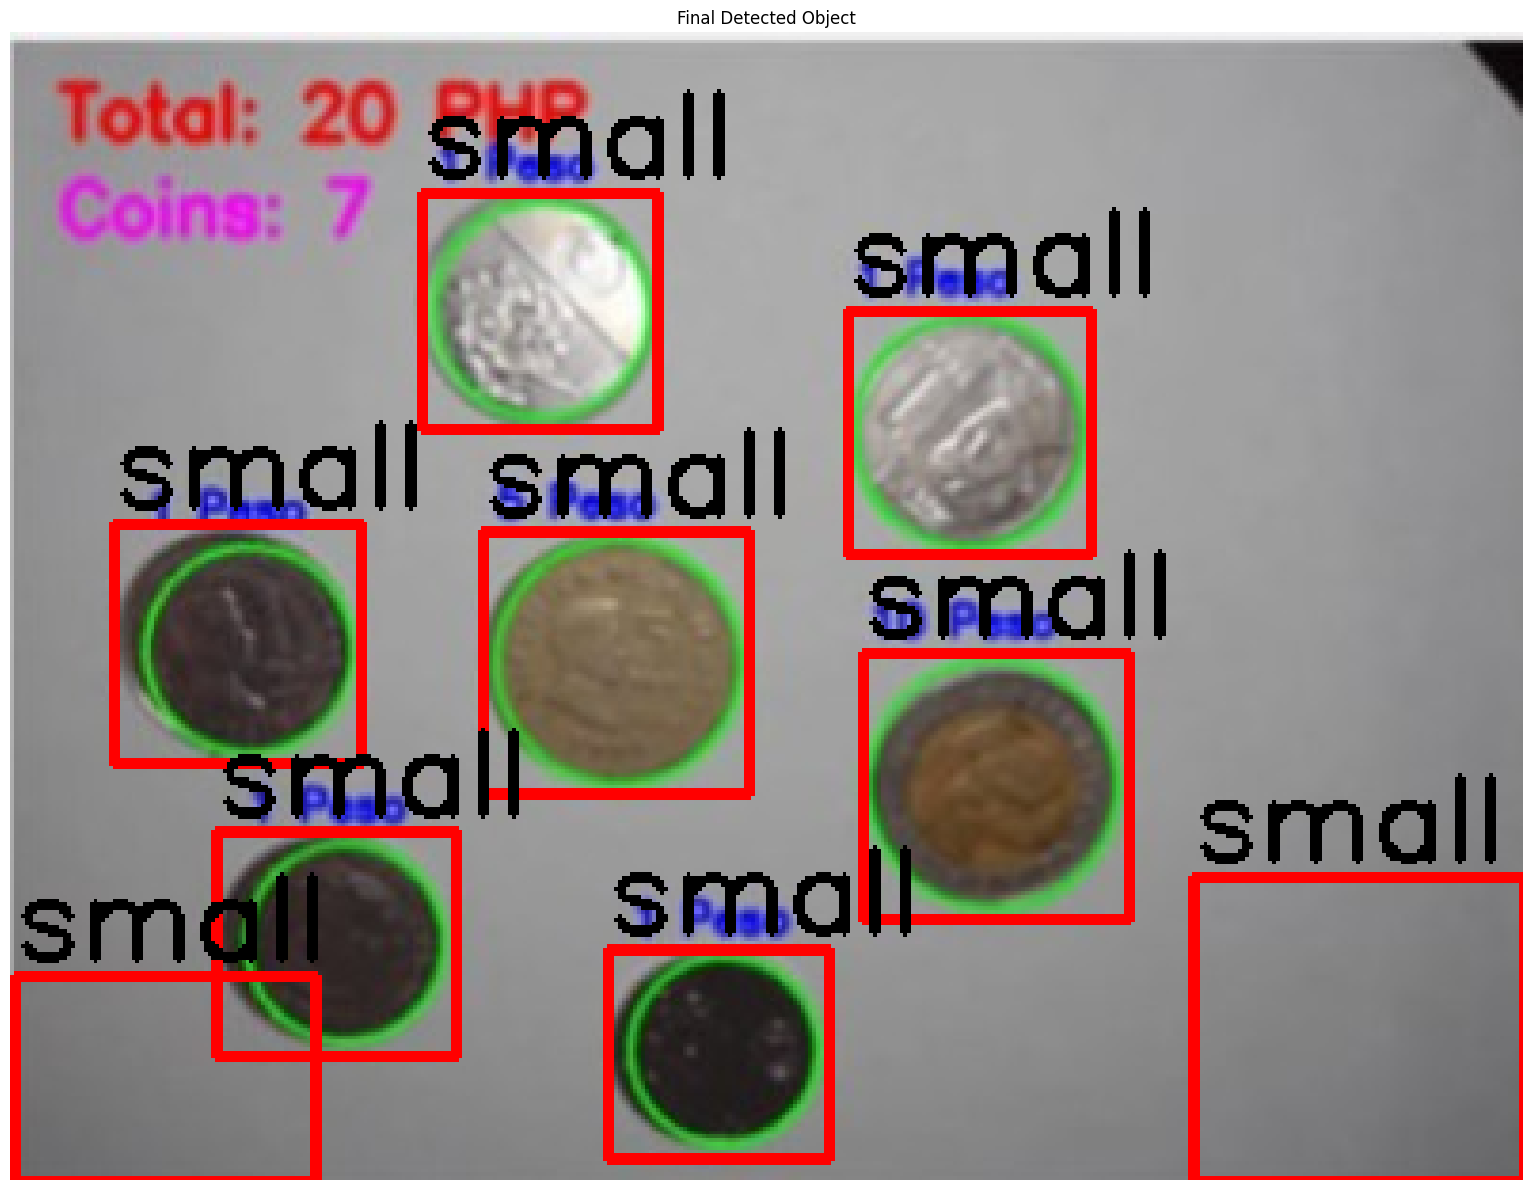

small: 9
medium: 0
large: 0
count: 9


In [14]:
# Classify objects
small, medium, large = [], [], []
for region in regions:
    area = region.area
    if area < 14000:
        small.append(region)
    elif area < 45000:
        medium.append(region)
    else:
        large.append(region)

# Draw boxes on copy of image
output_img = image_rgb.copy()
for region in small:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (255, 0, 0), 2)
    cv2.putText(output_img, 'small', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

for region in medium:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
    cv2.putText(output_img, 'medium', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

for region in large:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 0, 255), 2)
    cv2.putText(output_img, 'large', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

# Display results side-by-side
fig, axs = plt.subplots(1, 1, figsize=(18, 12))

axs.imshow(output_img)
axs.set_title("Final Detected Object")
axs.axis("off")

plt.tight_layout()
plt.show()

# Display total value
total_value = len(small)  + len(medium)  + len(large) 
print(f"small: {len(small)}")
print(f"medium: {len(medium)}")
print(f"large: {len(large)}")
print(f"count: {total_value}")

In [ ]:
import cv2
import numpy as np
import tkinter as tk
from PIL import Image, ImageTk

# HSV Ranges
LOWER_SILVER, UPPER_SILVER = np.array([0, 0, 80]), np.array([180, 60, 255])
LOWER_GOLD, UPPER_GOLD = np.array([10, 80, 80]), np.array([40, 255, 255])

def classify_coin(hsv, silver_mask, gold_mask, x, y, r):
    def count(mask, radius):
        temp = np.zeros(hsv.shape[:2], np.uint8)
        cv2.circle(temp, (x, y), radius, 255, -1)
        return cv2.countNonZero(cv2.bitwise_and(mask, mask, mask=temp))

    full, center = r, int(r * 0.55)
    silver_full, gold_full = count(silver_mask, full), count(gold_mask, full)
    silver_center, gold_center = count(silver_mask, center), count(gold_mask, center)
    silver_ring, gold_ring = silver_full - silver_center, gold_full - gold_center

    # Ratios
    def ratio(a, b): return a / (a + b + 1)
    s_full, g_full = ratio(silver_full, gold_full), ratio(gold_full, silver_full)
    s_center, g_center = ratio(silver_center, gold_center), ratio(gold_center, silver_center)
    s_ring, g_ring = ratio(silver_ring, gold_ring), ratio(gold_ring, silver_ring)

    if s_full > 0.7: return "1 Peso", 1
    if g_full > 0.7: return "5 Peso", 5
    if g_center > 0.5 and s_ring > 0.5: return "10 Peso", 10
    if s_center > 0.5 and g_ring > 0.5: return "20 Peso", 20
    return "Unknown", 0

# Setup camera
cap = cv2.VideoCapture(1)
cap.set(3, 640), cap.set(4, 480)

# Setup GUI (landscape layout)
root = tk.Tk()
root.title("Coin Detector")

panels = [tk.Label(root) for _ in range(4)]
for i, p in enumerate(panels):
    p.grid(row=0, column=i, padx=5, pady=5)  # all in one row

# Labels for results
total_label = tk.Label(root, text="Total: 0 PHP", font=("Arial", 16), fg="red")
coin_label = tk.Label(root, text="Coins: 0", font=("Arial", 16), fg="blue")
total_label.grid(row=1, column=0, columnspan=2, pady=10)
coin_label.grid(row=1, column=2, columnspan=2, pady=10)

def update_frame():
    ret, frame = cap.read()
    if not ret:
        return root.after(10, update_frame)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    silver_mask, gold_mask = cv2.inRange(hsv, LOWER_SILVER, UPPER_SILVER), cv2.inRange(hsv, LOWER_GOLD, UPPER_GOLD)

    # Circle detection
    gray = cv2.GaussianBlur(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), (9, 9), 2)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 40, param1=100, param2=25, minRadius=15, maxRadius=80)

    output, total, coin_count = frame.copy(), 0, 0
    if circles is not None:
        for x, y, r in np.uint16(np.around(circles[0])):
            cv2.circle(output, (x, y), r, (0, 255, 0), 2)
            coin, val = classify_coin(hsv, silver_mask, gold_mask, x, y, r)
            total += val
            coin_count += 1  # count every detected coin
            cv2.putText(output, coin, (x - r, y - r - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    cv2.putText(output, f"Total: {total} PHP", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    cv2.putText(output, f"Coins: {coin_count}", (20, 80),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 3)

    # Display in panels
    imgs = [
        ("Original Image", frame), ("Silver Mask", cv2.cvtColor(silver_mask, cv2.COLOR_GRAY2BGR)),
        ("Gold Mask", cv2.cvtColor(gold_mask, cv2.COLOR_GRAY2BGR)), ("Final Detected Object", output)
    ]
    for panel, (title, img) in zip(panels, imgs):
        im = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)).resize((320, 240))
        panel.imgtk = ImageTk.PhotoImage(im)
        panel.config(image=panel.imgtk, text=title, compound="top")

    total_label.config(text=f"Total: {total} PHP")
    coin_label.config(text=f"Coins: {coin_count}")
    root.after(10, update_frame)

def on_closing():
    cap.release()
    root.destroy()

root.protocol("WM_DELETE_WINDOW", on_closing)
update_frame()
root.mainloop()


C:\Users\Jhon Paul Ojales\AppData\Local\Temp\ipykernel_83532\1627421907.py:70: RuntimeWarning: overflow encountered in scalar subtract
  cv2.putText(output, coin, (x - r, y - r - 10),
